/home/doserbd/.cache/pypoetry/virtualenvs/hipster-6G3EPOia-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: >

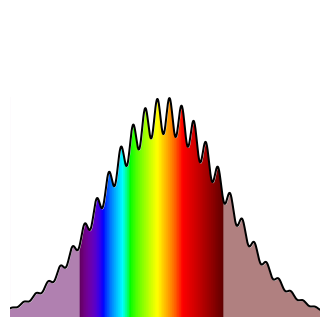

In [1]:
import numpy as np
from hipster import SpectrumPlotter

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths * 0.1) ** 2) * np.exp(-0.00002 * (wavelengths - 600) ** 2)
spectrum_plotter = SpectrumPlotter(wavelengths, figsize_in_pixel=400, return_type='plot')
plt = spectrum_plotter(spectrum)
plt

<Axes: >

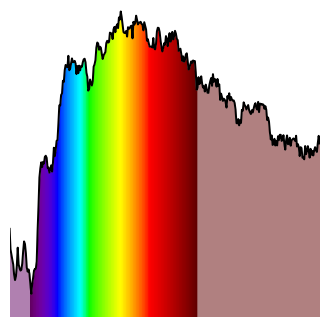

In [2]:
from hipster import Reconstruction

rg = Reconstruction("tests/models/vae_decoder.onnx")
point = np.array([[0, 0.5, 0.5]], dtype=np.float32)
spectrum = rg(point)[0][0]
wavelengths = np.arange(336, 1023, 2)
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400, return_type='plot')
plt = spectrum_plotter(spectrum)
plt

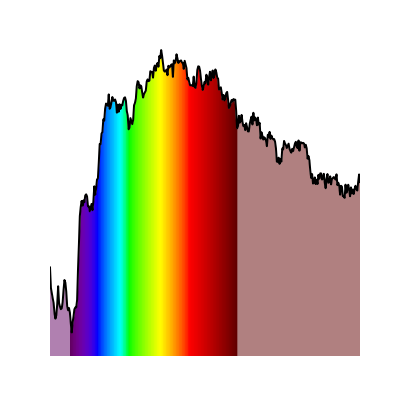

In [8]:
from PIL import Image

canvas = plt.figure.canvas
canvas.draw_idle()

# to_string_rgb is deprecated
# image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
# image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)

image_flat = np.frombuffer(canvas.tostring_argb(), dtype='uint8')
image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)[:,:,1:4]

image = Image.fromarray(image)
image

AttributeError: 'Figure' object has no attribute 'tostring_rgb'

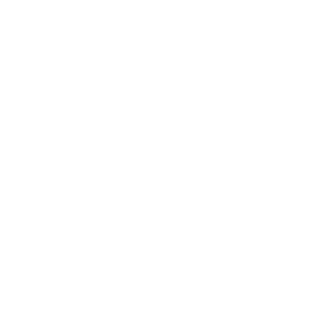

In [4]:
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400)
image = spectrum_plotter(spectrum)
image = Image.fromarray(image)
image
# image.save("test.jpg")